In [1]:
import numpy as np
import os
import re
import PyPDF2
import pdfplumber
import cv2
from pdf2image import convert_from_path
import pytesseract

import matplotlib as plt
import pandas as pd

#### Purpose of this notebook:
Converting all english HLS pdfs into PDF documents. Additional removing of page numbers and headings. 

TOTAL: 764 english documents

Use of: https://tesseract-ocr.github.io/tessdoc/Installation.html
and other packages. > needs to be noted somewhere.

First try to extract text with PyPDF2.
Some PDFs are scans from documents. Need to be processed in another way. In this case with the use of Tesseract

- Document name needs to stay the same
- inventarize: number of 'on behalf of' speeches. - total: 34 - see overall excel sheet

In [5]:
# Define pdf_to_text function - initial version
def pdf_to_text(pdf_path, text_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        with open(text_path, 'w', encoding='utf-8') as text_file:
            num_pages = len(pdf_reader.pages)
            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text_file.write(page.extract_text())

# Loop over all available files in HLS_pfd_eng folder
# assign directory
directory = 'HLS_pdf_en/ENG'

# iterate over files in that directory
#for pdf_file in os.listdir(directory):
    # input_path = os.path.join(directory, pdf_file)
    # output_path = os.path.join('HLS_txt', os.path.splitext(pdf_file)[0] + '.txt')
    # try:
    #     pdf_to_text(input_path, output_path)
    #
    # except Exception as e:
    #      # If an exception occurs (indicating a potentially corrupted file), skip to the next file
    #     print(f"Error processing {pdf_file}: {e}")
    #     continue

In [6]:
pdf_to_text('HLS_pdf_en/NON ENG/cop20_hls_spain_english.pdf','HLS_txt/cop20_hls_spain_english.txt')

#### Image text extraction
Manual inspection shows; 77 items (documents) not able to extract - txt file size 0kb

Problem: part of the PDFs are document scans, not containing textual information. Needs to be converted with OCR.
https://medium.com/@dr.booma19/extracting-text-from-pdf-files-using-ocr-a-step-by-step-guide-with-python-code-becf221529ef

** Please note: USA COP25 - only presents link to US database - manual download from there **

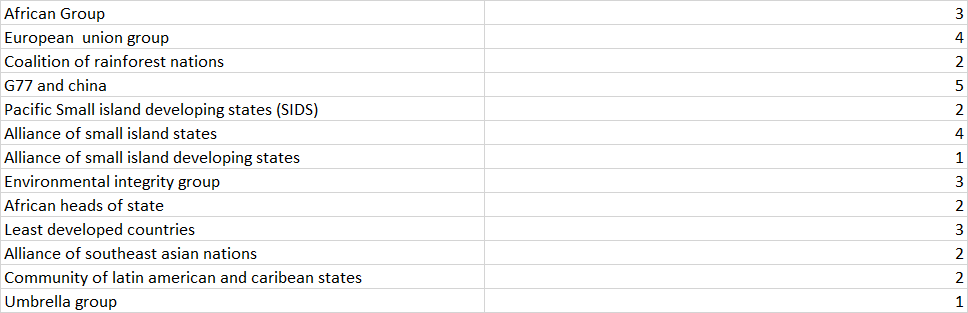

In [3]:
# Fix orientation and grayscale of documents
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

In [4]:
# Define how to extract text from image
def extract_text_from_image(image):
    text = pytesseract.image_to_string(image)
    return text

In [5]:
# Save text to txt file
def save_text_to_file(text_list, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        for text in text_list:
            file.write(text + '\n')

Use pytesseract to extract text from documents that did not process with basic pyPDF2.

Iterate through file sizes and put file names of empty files in list.


In [6]:
# Directory path
txt_directory = 'HLS_txt'

# Get a list of files in the directory
files = os.listdir(txt_directory)

# Iterate through the files and check their sizes
empty_files = []
#for file in files:
    file_path = os.path.join(txt_directory, file)
    # Check if the file is empty (0KB)
    if os.path.getsize(file_path) == 0:
        file_name = file[:-4]
        empty_files.append(file_name)

# Print the names of empty files
print('Total nr. of empty files:', len(empty_files))
print("Empty files in the directory:")
#for file in empty_files:
    print(file)

Total nr. of empty files: 76
Empty files in the directory:
afghanistan_cop22cmp12cma1_hls
australia_cop22cmp12cma1_hls
azerbaijan_cop22cmp12cma1_hls
china_cop22cmp12cma1_hls
CHINA_cop26cmp16cma3_HLS_WLS_CN_EN_FR
cop19_hls_botswana
cop19_hls_estonia
cop19_hls_european_union
cop19_hls_fiji_g77china
cop19_hls_germany
cop19_hls_liberia
cop19_hls_malaysia
cop19_hls_mozambique
cop19_hls_niue
cop19_hls_norway
cop19_hls_peoples_republic_of_china
cop19_hls_romania
cop19_hls_solomon_islands
cop19_hls_sri_lanka
cop19_hls_timor_leste
cop19_hls_turkey
cop19_hls_uganda
cop19_hls_united_republic_of_tanzania
cop19_hls_uzbekistan
cop19_hls_vietnam
cop19_hls_zambia
cop20_hls_holy_sea_english
cop21cmp11_hls_speech_agn_egypt
cop21cmp11_hls_speech_bangladesh
cop21cmp11_hls_speech_bosnia_herz
cop21cmp11_hls_speech_celac_ecuador
cop21cmp11_hls_speech_eritrea
cop21cmp11_hls_speech_eu
cop21cmp11_hls_speech_guyana
cop21cmp11_hls_speech_israel
cop21cmp11_hls_speech_japan
cop21cmp11_hls_speech_liberia
cop21cmp11_

In [7]:
# Loop over all available files
# assign directory
directory = 'HLS_pdf_en/ENG'
pdf_files = os.listdir(directory)

# convert with pytesseract
image_pdf = []

#for pdf_file in pdf_files:
    pdf_file_name = pdf_file[:-4]
    if pdf_file_name in empty_files:
        file_path = os.path.join(directory, pdf_file)
        image_pdf.append(pdf_file)
    else:
        continue

print(image_pdf)


['afghanistan_cop22cmp12cma1_hls.pdf', 'australia_cop22cmp12cma1_hls.pdf', 'azerbaijan_cop22cmp12cma1_hls.pdf', 'china_cop22cmp12cma1_hls.pdf', 'CHINA_cop26cmp16cma3_HLS_WLS_CN_EN_FR.pdf', 'cop19_hls_botswana.pdf', 'cop19_hls_estonia.pdf', 'cop19_hls_european_union.pdf', 'cop19_hls_fiji_g77china.pdf', 'cop19_hls_germany.pdf', 'cop19_hls_liberia.pdf', 'cop19_hls_malaysia.pdf', 'cop19_hls_mozambique.pdf', 'cop19_hls_niue.pdf', 'cop19_hls_norway.pdf', 'cop19_hls_peoples_republic_of_china.pdf', 'cop19_hls_romania.pdf', 'cop19_hls_solomon_islands.pdf', 'cop19_hls_sri_lanka.pdf', 'cop19_hls_timor_leste.pdf', 'cop19_hls_turkey.pdf', 'cop19_hls_uganda.pdf', 'cop19_hls_united_republic_of_tanzania.pdf', 'cop19_hls_uzbekistan.pdf', 'cop19_hls_vietnam.pdf', 'cop19_hls_zambia.pdf', 'cop20_hls_holy_sea_english.pdf', 'cop21cmp11_hls_speech_agn_egypt.pdf', 'cop21cmp11_hls_speech_bangladesh.pdf', 'cop21cmp11_hls_speech_bosnia_herz.pdf', 'cop21cmp11_hls_speech_celac_ecuador.pdf', 'cop21cmp11_hls_speech_

In [8]:
# iterate over files in the not-correctly processed pfd file directory
#for pdf_file in image_pdf:
    input_path = os.path.join(directory, pdf_file)

    output_path = os.path.join('HLS_txt', os.path.splitext(pdf_file)[0] + '.txt')

    try:
        pages = convert_from_path(input_path)

        extracted_text = []

        for page in pages:
            # Step 2: Preprocess the image (deskew)
            preprocessed_image = deskew(np.array(page))

            # Step 3: Extract text using OCR
            text = extract_text_from_image(preprocessed_image)
            extracted_text.append(text)

        save_text_to_file(extracted_text, output_path)
        print("Text extracted from PDF and saved to", output_path)

    except Exception as e:
         # If an exception occurs (indicating a potentially corrupted file), skip to the next file
        print(f"Error processing {pdf_file}: {e}")
        continue

Text extracted from PDF and saved to HLS_txt\afghanistan_cop22cmp12cma1_hls.txt
Text extracted from PDF and saved to HLS_txt\australia_cop22cmp12cma1_hls.txt
Text extracted from PDF and saved to HLS_txt\azerbaijan_cop22cmp12cma1_hls.txt
Text extracted from PDF and saved to HLS_txt\china_cop22cmp12cma1_hls.txt
Text extracted from PDF and saved to HLS_txt\CHINA_cop26cmp16cma3_HLS_WLS_CN_EN_FR.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_botswana.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_estonia.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_european_union.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_fiji_g77china.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_germany.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_liberia.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_malaysia.txt
Text extracted from PDF and saved to HLS_txt\cop19_hls_mozambique.txt
Text extracted from PDF and saved to HLS_txt\cop

Important: need a manual evaluation of the documents to check if everything is converted to txt. This is necessary because lay-outs and fonts are varying between documents and OCR might not be able to interpret everything as well.

Check random stash of image-converted documents, also removing some unnecessary information like headers. There also will be some incomplete/inaccurately processed documents. These need to be marked and evaluated.

First: reformat all files.

In [12]:
def remove_double_spaces_in_file(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding) as file:
        content = file.read()

    # Replace double spaces with single spaces
    modified_content = content.replace('  ', ' ')

    with open(file_path, 'w', encoding=encoding) as file:
        file.write(modified_content)

def remove_double_spaces_in_directory(directory, encoding='utf-8'):
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            remove_double_spaces_in_file(file_path, encoding=encoding)

#remove_double_spaces_in_directory(txt_directory)
print("Double spaces removed from all .txt files in the directory.")

Double spaces removed from all .txt files in the directory.


In [9]:
# Currently not necessary
def standardize_text_files(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Iterate through each file
    for file_name in files:
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                try:
                    text = file.read()
                except UnicodeDecodeError:
                    print(f"Error reading file: {file_path}. Skipping...")
                    continue
                # Standardize line endings to '\n'
                text = text.replace('\r\n', '\n').replace('\r', '\n')
                # Remove extra whitespaces
                text = re.sub(r'\s+', ' ', text)
                # Remove leading and trailing whitespaces from each line
                text = '\n'.join(line.strip() for line in text.split('\n'))
                # Remove spaces before commas and periods
                text = re.sub(r'\s+([,.])', r'\1', text)
            # Write back the processed text to the file
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(text)

#standardize_text_files(txt_directory)